## Iris Flower Classification Using Machine Learning Algorithm SVM

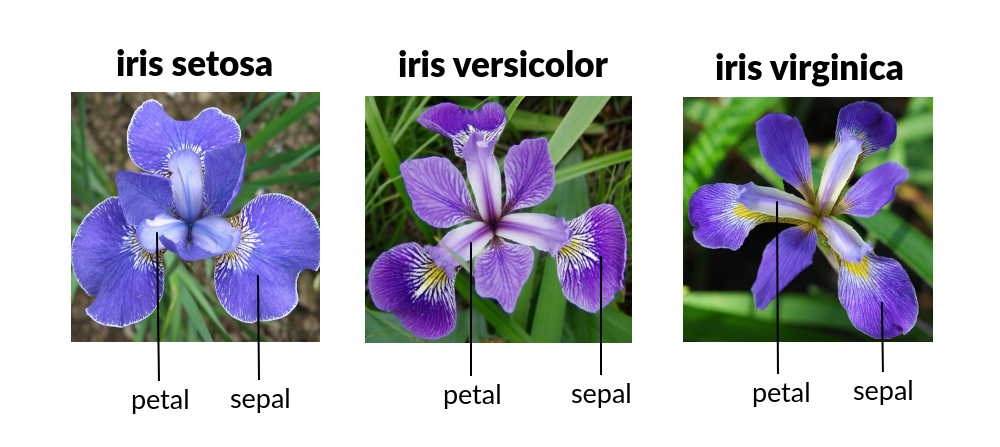

In this project we are going to do classifiy the Iris flowers based on the flower's fearutres such as petal lenght and sepal length. After finishing train model we are going to do test the model for clssifying the Flowers based on thier features.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### About the Dataset

Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

Iris-setosa (n=50), Iris-versicolor (n=50), Iris-virginica (n=50)

The four features of the Iris dataset:

sepal length in cm, sepal width in cm, petal length in cm, petal width in cm

### Load Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Preprocessing

In [3]:
# Checking the Null Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Exploratory Data Analysis

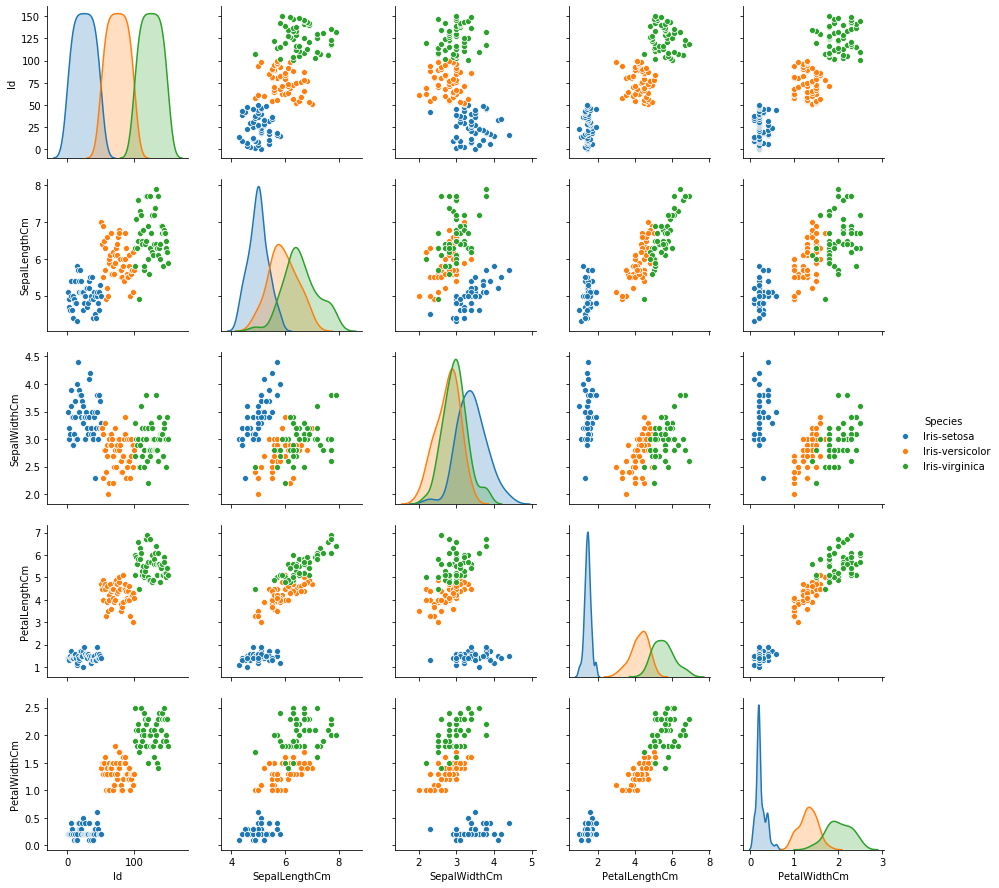

In [4]:
sns.pairplot(df,hue='Species')

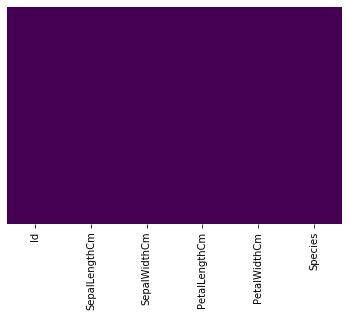

In [5]:
# Checking the null values using heatmap visualizing plot.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

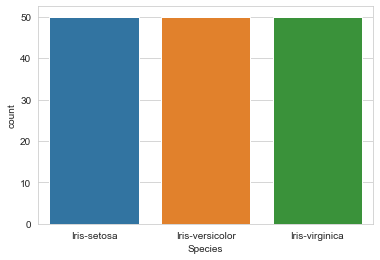

In [6]:
# Counting the number of Species into the dataset
sns.set_style('whitegrid')
sns.countplot(x='Species',data=df)

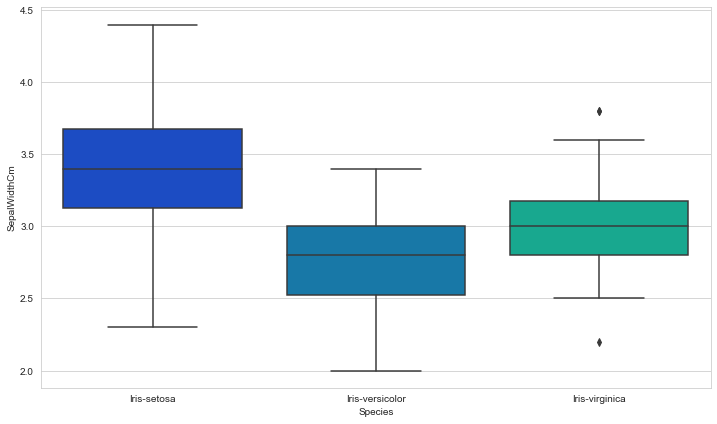

In [7]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Species',y='SepalWidthCm',data=df,palette='winter')

### Model Building

In [8]:
# Assigning the values
X = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,[-1]].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
pred = svm.predict(X_test)

In [12]:
# Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [13]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [14]:
# Making Predicitoins
svm.predict([[5.3,3.4,2.7,3.9]])

array(['Iris-virginica'], dtype=object)

In [15]:
# Accuracy Level
print("Accuracy Score:",svm.score(X_test,y_test) * 100)

Accuracy Score: 97.77777777777777


We made a Wonderfull Model and Predictions !!!!!!......

### Hyper parameter tuning using Gridsearch CV

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))

[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]


In [20]:
# Classification Report
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [21]:
# Make Predicitoins
svm.predict([[6.3,2.5,5.0,1.9]])

array(['Iris-virginica'], dtype=object)